In [1]:
import pandas as pd
import numpy as np
from collections import Counter

# to visualise all the columns in the dataframe
pd.set_option("display.max_columns", None, "display.max_rows", None)

# Libs to visuzalizations
import matplotlib.pyplot as plt
import seaborn as sns

# changing style of the plots
sns.set(style="darkgrid")



# Hiding warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading datasets
df_2019 = pd.read_csv('datasets/survey_results_public_2019.csv')
df_2020= pd.read_csv('datasets/survey_results_public_2020.csv')
df_2021= pd.read_csv('datasets/survey_results_public_2021.csv')


In [4]:
def filter_df(df, column_to_filter, value_of_filter, columns):
    ''' Filter a dataframe by colum_to_filter, value of the filter and columns.
        returns the filtered dataframe.

        columns_to_filter = name of the dataframe column to filter (string)
        value_of_filter = value of the filter
        columns = columns in the filtered dataframe
    '''

    df_clone = df
    for column in columns:
        df_clone = df_clone[df_clone[column_to_filter]==value_of_filter].dropna(subset=[column])
    return df_clone

In [5]:
data_2019 = filter_df(df_2019, 'Country', 'Brazil', ['LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear'])
data_2020 = filter_df(df_2020, 'Country', 'Brazil', ['LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear'])
data_2021 = filter_df(df_2021, 'Country', 'Brazil', ['LanguageHaveWorkedWith','LanguageWantToWorkWith','DatabaseHaveWorkedWith','DatabaseWantToWorkWith'])

In [6]:
# Getting computer languages from year 2019 to 2021 as pandas series

work_language_2019 = data_2019['LanguageWorkedWith'].apply(lambda x: x.split(';'))
want_work_language_2019 = data_2019['LanguageDesireNextYear'].apply(lambda x: x.split(';'))

work_language_2020 = data_2020['LanguageWorkedWith'].apply(lambda x: x.split(';'))
want_work_language_2020 = data_2020['LanguageDesireNextYear'].apply(lambda x: x.split(';'))

work_language_2021 = data_2021['LanguageHaveWorkedWith'].apply(lambda x: x.split(';'))
want_work_language_2021 = data_2021['LanguageWantToWorkWith'].apply(lambda x: x.split(';'))

In [7]:
# Getting databases infos from year 2019 to 2021 as pandas series

work_database_2019 = data_2019['DatabaseWorkedWith'].apply(lambda x: x.split(';'))
want_work_database_2019 = data_2019['DatabaseDesireNextYear'].apply(lambda x: x.split(';'))

work_database_2020 = data_2020['DatabaseWorkedWith'].apply(lambda x: x.split(';'))
want_work_database_2020 = data_2020['DatabaseDesireNextYear'].apply(lambda x: x.split(';'))

work_database_2021 = data_2021['DatabaseHaveWorkedWith'].apply(lambda x: x.split(';'))
want_work_database_2021 = data_2021['DatabaseWantToWorkWith'].apply(lambda x: x.split(';'))

In [8]:
def flat_list(arr):
    ''' Flat a nested list,
        returns a flatted list.
    '''
    
    data_objs = []
    
    for row in arr:
        for obj in row:
            data_objs.append(obj.strip())
            
    return  data_objs

In [9]:
# Flatted list for computer languages - HaveWorkd and WantToWork from 2019 and 2021

list_work_language_2019 = flat_list(work_language_2019)
list_want_work_language_2019 = flat_list(want_work_language_2019)

list_work_language_2020 = flat_list(work_language_2020)
list_want_work_language_2020 = flat_list(want_work_language_2020)

list_work_language_2021 = flat_list(work_language_2021)
list_want_work_language_2021 = flat_list(want_work_language_2021)

In [10]:
# Flatted list for databases - HaveWorkd and WantToWork from 2019 and 2021

list_work_database_2019 = flat_list(work_database_2019)
list_want_work_database_2019 = flat_list(want_work_database_2019)

list_work_database_2020 = flat_list(work_database_2020)
list_want_work_database_2020 = flat_list(want_work_database_2020)

list_work_database_2021 = flat_list(work_database_2021)
list_want_work_database_2021 = flat_list(want_work_database_2021)

In [11]:
def group_list(data_list, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language/Database':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict



In [12]:
# List and Dictionary for programming languages from 2019 to 2021
dict_work_languages_2019 = group_list(list_work_language_2019, '2019')
dict_want_work_languages_2019 = group_list(list_want_work_language_2019, '2019')

dict_work_languages_2020 = group_list(list_work_language_2020, '2020')
dict_want_work_languages_2020 = group_list(list_want_work_language_2020, '2020')

dict_work_languages_2021 = group_list(list_work_language_2021, '2021')
dict_want_work_languages_2021 = group_list(list_want_work_language_2021, '2021')

In [13]:
# List and Dictionary for databases from 2019 to 2021
dict_work_databases_2019 = group_list(list_work_database_2019, '2019')
dict_want_work_databases_2019 = group_list(list_want_work_database_2019, '2019')

dict_work_databases_2020 = group_list(list_work_database_2020, '2020')
dict_want_work_databases_2020 = group_list(list_want_work_database_2020, '2020')

dict_work_databases_2021 = group_list(list_work_database_2021, '2021')
dict_want_work_databases_2021 = group_list(list_want_work_database_2021, '2021')

In [14]:
def create_dataframe(data_dicts):
    ''' Create 3 dataframes and add them together,
        returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])
    df3 = pd.DataFrame(data_dicts[2])

    df = df1.append(df2)
    df = df.append(df3)
    
    return df

# Creating the dataframes to be used in the plots
worked_languages = create_dataframe([dict_work_languages_2019, dict_work_languages_2020,dict_work_languages_2021])
wanted_languages = create_dataframe([dict_want_work_languages_2019, dict_want_work_languages_2020,dict_want_work_languages_2021])


worked_databases = create_dataframe([dict_work_databases_2019, dict_work_databases_2020,dict_work_databases_2021])
wanted_databases = create_dataframe([dict_want_work_databases_2019, dict_want_work_databases_2020,dict_want_work_databases_2021])

In [15]:
def percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series



In [16]:
# Calculating the percentage for programming languages
worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')

In [17]:
# Calculating the percentage for databases
worked_databases['Percentage'] = percentage(worked_databases, 'Year')
wanted_databases['Percentage'] = percentage(wanted_databases, 'Year')

In [18]:
# Get the top 20 languages
top_worked_lang = worked_languages.sort_values(by=['Percentage'], ascending=False).head(20)['Programming Language/Database'].unique()
top_wanted_lang = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(20)['Programming Language/Database'].unique()

worked_lang_chart = worked_languages[worked_languages['Programming Language/Database'].isin(top_worked_lang)]
wanted_lang_chart = wanted_languages[wanted_languages['Programming Language/Database'].isin(top_worked_lang)]

In [19]:
# Get the top 20 databases
top_worked_databases = worked_databases.sort_values(by=['Percentage'], ascending=False).head(20)['Programming Language/Database'].unique()
top_wanted_databases = wanted_databases.sort_values(by=['Percentage'], ascending=False).head(20)['Programming Language/Database'].unique()

worked_database_chart = worked_databases[worked_databases['Programming Language/Database'].isin(top_worked_databases)]
wanted_database_chart = wanted_databases[wanted_databases['Programming Language/Database'].isin(top_worked_databases)]

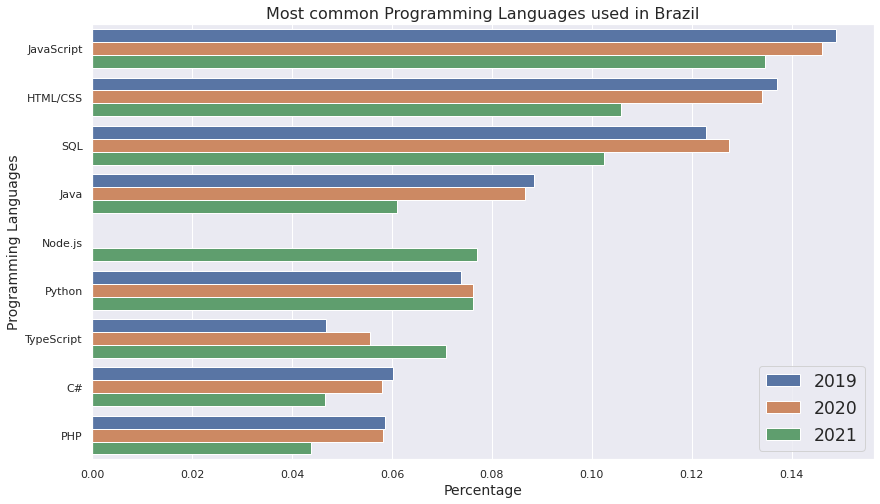

In [20]:
# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language/Database',
            hue = 'Year',
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Programming Languages used in Brazil', size = 16)
plt.show()

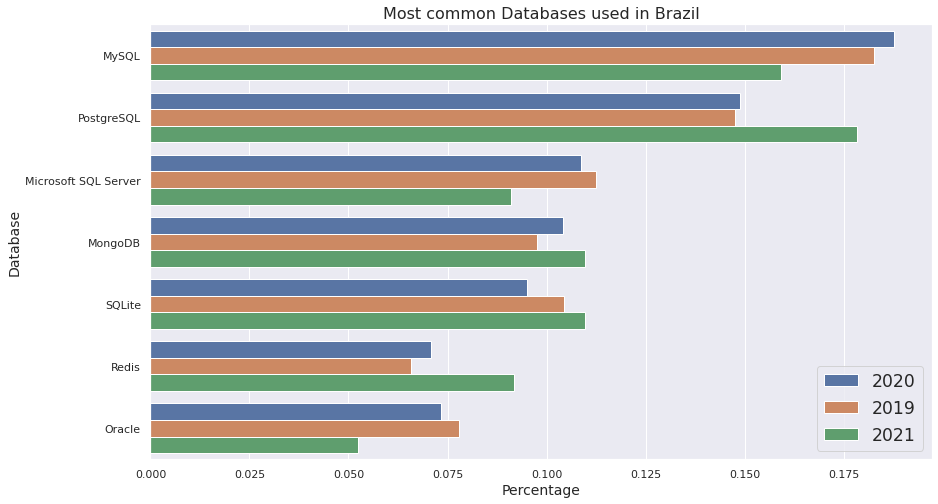

In [21]:
# Figure 1 — Percentage of use databases flavors among all the cited programming 
# databases by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language/Database',
            hue = 'Year',
            data = worked_database_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Database", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Databases used in Brazil', size = 16)
plt.show()

In [34]:
mental_21 = filter_df(df_2021, 'Country', 'Brazil', ['Age','Gender','Trans','Sexuality','MentalHealth'])
mental_21.head(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
19,20,"I used to be a developer by profession, but no...",Employed full-time,Brazil,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",12,9,Other (please specify):,NaN,NaN,NaN,NaN,C;C++;HTML/CSS;JavaScript;Matlab;Node.js;PHP;P...,C;C++;HTML/CSS;JavaScript;Node.js;Python;SQL;T...,MariaDB;MySQL,MariaDB;MySQL,NaN,NaN,Angular;Express;Flask;React.js;Svelte,Express;Flask;React.js,NumPy,NumPy;Qt;React Native;TensorFlow,Git,Git,Vim;Visual Studio;Visual Studio Code,Vim;Visual Studio;Visual Studio Code,Linux-based,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,A few times per week,"Yes, somewhat",Yes,25-34 years old,Man,No,Straight / Heterosexual,Multiracial,None of the above,None of the above,Appropriate in length,Easy,NaN
45,46,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Coding Bootcamp,22,15,"Developer, desktop or enterprise applications;...",2 to 9 employees,BRL\tBrazilian real,22000.0,Monthly,C#;C++;JavaScript;PowerShell;SQL;TypeScript,C#;Clojure;F#;SQL;TypeScript,Microsoft SQL Server;PostgreSQL;Redis,Microsoft SQL Server;PostgreSQL;Redis,Heroku;Microsoft Azure,AWS;Microsoft Azure,ASP.NET Core ;React.js,ASP.NET Core ;React.js;Svelte,.NET Core / .NET 5,.NET Core / .NET 5;React Native,Docker;Git;Kubernetes,Docker;Git;Unity 3D;Unreal Engine,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Visit Stack Overflow;Go for a walk or other ph...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,A few times per week,"Yes, somewhat",No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Easy,60480.0
296,297,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,Some college/university study without earning ...,18 - 24 years,School,12,12,"Developer, front-end",10 to 19 employees,BRL\tBrazilian real,3200.0,Monthly,Dart;HTML/CSS;JavaScript;TypeScript,Dart;HTML/CSS;JavaScript;Node.js;TypeScript,Firebase;MySQL;SQLite,Firebase;MySQL;SQLite,NaN,NaN,Angular,Angular;Express;Vue.js,Cordova,.NET Core / .NET 5;Cordova;Flutter,Docker;Git,Docker;Git;Unity 3D,Sublime Text;Visual Studio Code,Android Studio;Sublime Text;Visual Studio;Visu...,Linux-based,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,Daily or almost daily,"Yes, somewhat",No,25-34 years old,Man,No,Straight / Heterosexual,"Or, in your own words:",None of the above,None of the above,Appropriate in length,Easy,8796.0
352,353,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Coding Bootcamp;School;Online Forum;Online Cou...,10,15,"Developer, full-stack;Engineer, data;Database ...","Just me - I am a freelancer, sole proprietor, ...",USD\tUnited States dollar,NaN,Monthly,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Microsoft SQL Server,Microsoft SQL Server,Google Cloud Platform;Microsoft Azure,Google Cloud Platform,ASP.NET,Angular.js;ASP.NET Core,.NET Framework,.NET Core / .NET 5,NaN,NaN,Visual Studio;Visual Studio Code,Visual Studio

In [35]:
mental_21_few = mental_21.loc[:, mental_21.columns.isin(['ResponseId','Age','Gender','Trans','Sexuality','MentalHealth'])]
mental_21_few.head(3)

In [18]:
mental_21.loc[mental_21['MentalHealth']=='None of the above']

,ResponseId,Age,Gender,Trans,Sexuality,MentalHealth
0,1,25-34 years old,Man,No,Straight / Heterosexual,None of the above
1,2,18-24 years old,Man,No,Straight / Heterosexual,None of the above
2,3,18-24 years old,Man,No,Prefer not to say,None of the above
6,7,Prefer not to say,Prefer not to say,No,NaN,None of the above
7,8,18-24 years old,Woman,No,Straight / Heterosexual,None of the above
...,...,...,...,...,...,...
83431,83432,18-24 years old,Man,No,Straight / Heterosexual,None of the above
83432,83433,18-24 years old,Woman,No,Straight / Heterosexual,None of the above
83435,83436,18-24 years old,Man,No,Straight / Heterosexual,None of the above
83436,83437,25-34 years old,Man,No,NaN,None of the above


In [5]:
mental_21['MentalHealth'] = mental_21['MentalHealth'].map({'None of the above':'positive'})

In [6]:
mental_21.head(5)

,ResponseId,Age,Gender,MentalHealth
0,1,25-34 years old,Man,positive
1,2,18-24 years old,Man,positive
2,3,18-24 years old,Man,positive
3,4,35-44 years old,Man,NaN
4,5,25-34 years old,Man,NaN


In [7]:
len(mental_21['MentalHealth'].unique())

2

In [8]:
mental_21[(mental_21['MentalHealth']!='None of the above') & (mental_21['MentalHealth']!=np.nan)].head(2)


,ResponseId,Age,Gender,MentalHealth
0,1,25-34 years old,Man,positive
1,2,18-24 years old,Man,positive


In [9]:
1-np.sum(mental_21['MentalHealth'].notnull()) / mental_21.shape[0]

0.3233499922098779

In [47]:
a=mental_21.loc[np.where((mental_21['MentalHealth']!='None of the above') & (mental_21['MentalHealth'].notnull()))]

In [59]:
a['max_age']=a['max_age'].str.split().str[0]

In [11]:
mental_21.loc[np.where((mental_21['Gender']=='Man')&(mental_21['Age']=='18-24 years old'))]

,ResponseId,Age,Gender,MentalHealth
1,2,18-24 years old,Man,positive
2,3,18-24 years old,Man,positive
21,22,18-24 years old,Man,positive
33,34,18-24 years old,Man,NaN
36,37,18-24 years old,Man,NaN
...,...,...,...,...
83425,83426,18-24 years old,Man,positive
83426,83427,18-24 years old,Man,NaN
83431,83432,18-24 years old,Man,positive
83435,83436,18-24 years old,Man,positive


In [12]:
mental_21.loc[np.where((mental_21['MentalHealth']!='None of the above') & (mental_21['MentalHealth'].notnull()))]

,ResponseId,Age,Gender,MentalHealth
0,1,25-34 years old,Man,positive
1,2,18-24 years old,Man,positive
2,3,18-24 years old,Man,positive
6,7,Prefer not to say,Prefer not to say,positive
7,8,18-24 years old,Woman,positive
...,...,...,...,...
83431,83432,18-24 years old,Man,positive
83432,83433,18-24 years old,Woman,positive
83435,83436,18-24 years old,Man,positive
83436,83437,25-34 years old,Man,positive


In [13]:
idx = np.where((mental_21['MentalHealth']!='None of the above') & (mental_21['MentalHealth'].notnull()))
mental_21.loc[idx]

,ResponseId,Age,Gender,MentalHealth
0,1,25-34 years old,Man,positive
1,2,18-24 years old,Man,positive
2,3,18-24 years old,Man,positive
6,7,Prefer not to say,Prefer not to say,positive
7,8,18-24 years old,Woman,positive
...,...,...,...,...
83431,83432,18-24 years old,Man,positive
83432,83433,18-24 years old,Woman,positive
83435,83436,18-24 years old,Man,positive
83436,83437,25-34 years old,Man,positive


In [14]:
mental_21[mental_21['MentalHealth']!='None of the above']

,ResponseId,Age,Gender,MentalHealth
0,1,25-34 years old,Man,positive
1,2,18-24 years old,Man,positive
2,3,18-24 years old,Man,positive
3,4,35-44 years old,Man,NaN
4,5,25-34 years old,Man,NaN
...,...,...,...,...
83434,83435,25-34 years old,Man,NaN
83435,83436,18-24 years old,Man,positive
83436,83437,25-34 years old,Man,positive
83437,83438,25-34 years old,Man,NaN


In [15]:
df_2021 = pd.read_csv('datasets/survey_results_public_2021.csv')
df_2021.head(2)


,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN


In [5]:
d_2021 = pd.read_csv('datasets/survey_results_public_2021.csv', usecols=['ResponseId','Country', 'EdLevel','LanguageHaveWorkedWith','LanguageWantToWorkWith','Age','Gender'])
d_2021.head(2)

,ResponseId,Country,EdLevel,LanguageHaveWorkedWith,LanguageWantToWorkWith,Age,Gender
0,1,Slovakia,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,25-34 years old,Man
1,2,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",JavaScript;Python,NaN,18-24 years old,Man


In [16]:
df_2020= pd.read_csv('datasets/survey_results_public_2020.csv')
df_2020.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4


In [7]:
d_2020 = pd.read_csv('datasets/survey_results_public_2020.csv', usecols=['Respondent','Country', 'EdLevel','LanguageWorkedWith','LanguageDesireNextYear','Age','Gender'])
d_2020.head(2)

,Respondent,Age,Country,EdLevel,Gender,LanguageDesireNextYear,LanguageWorkedWith
0,1,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Man,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript
1,2,NaN,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Python;Swift,JavaScript;Swift


In [34]:
df = pd.read_csv('~/Downloads/base21Full.csv')

In [43]:
df.to_csv('~/Downloads/base21Full.csv', index =False)

In [16]:
df.loc[np.where((df['Module']=='Journey - Pesquisa de Clima'))]

,id,Module,Filtro,Valor_de_filtro,intention,intenção,time_ref,type,type2,Cliente,reference_id,answers_counts,detrator,neutro,promotor,score_V0,score_atual
5187,5187,Journey - Pesquisa de Clima,-,-,ability_to_cope_with_stress,[M] Capacidade de Lidar com Estresse,Aug,Question::Favorability,Question::Favorability,['3 Corações' 'BBM Logistica'],[4533 4232],81,1.0,13.0,67.0,0.827160,0.753333
5188,5188,Journey - Pesquisa de Clima,-,-,ability_to_cope_with_stress,[M] Capacidade de Lidar com Estresse,Jul,Question::Favorability,Question::Favorability,['BBM Logistica'],[4232],2,1.0,0.0,1.0,0.500000,0.500000
5189,5189,Journey - Pesquisa de Clima,-,-,ability_to_cope_with_stress,[M] Capacidade de Lidar com Estresse,Sep,Question::Favorability,Question::Favorability,['3 Corações' 'BBM Logistica'],[4533 4232],26,2.0,1.0,23.0,0.884615,0.937500
5190,5190,Journey - Pesquisa de Clima,-,-,ability_to_cope_with_stress,[M] Capacidade de Lidar com Estresse,Total,Question::Favorability,Question::Favorability,['3 Corações' 'BBM Logistica'],[4533 4232],109,4.0,14.0,91.0,0.834862,0.795792
5191,5191,Journey - Pesquisa de Clima,-,-,access_to_resources_in_remote_work,[JC] Acesso a Recursos no Trabalho Remoto,Aug,Question::Favorability,Question::Favorability,['BBM Logistica'],[4232],69,11.0,20.0,38.0,0.550725,0.550725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31338,31338,Journey - Pesquisa de Clima,Área,Tecnologia,work_environment,[JC] Ambiente de Trabalho,Sep,Question::Favorability,Question::Favorability,['Gerando Falcões'],[4587],6,1.0,0.0,5.0,0.833333,0.833333
31339,31339,Journey - Pesquisa de Clima,Área,Tecnologia,work_environment,[JC] Ambiente de Trabalho,Total,Question::Favorability,Question::Favorability,['Caloi' 'Consórcio Magalu' 'Gerando Falcões'],[4786 4788 4789 4793 4587],39,1.0,2.0,36.0,0.923077,0.919753
31340,31340,Journey - Pesquisa de Clima,Área,Tecnologia,workload,[JC] Volume de Trabalho,Apr,Question::Favorability,Question::Favorability,['Vee'],[3806],13,1.0,2.0,10.0,0.769231,0.769231
31341,31341,Journey - Pesquisa de Clima,Área,Tecnologia,workload,[JC] Volume de Trabalho,Sep,Question::Favorability,Question::Favorability,['Gerando Falcões'],[4587],6,3.0,0.0,3.0,0.500000,0.500000


In [90]:
d00=d1.append(d2, ignore_index=True)


In [102]:
b['Percentage'] = percentage(b, 'year')

In [2]:
import pandas as pd
import numpy as np

In [48]:
df=pd.read_csv('~/Downloads/panorama_10fev_u.csv')
df

,Unnamed: 0,Module,Filtro,Valor_de_filtro,intention,intenção,time_ref,type,type2,Cliente,reference_id,answers_counts,detrator,neutro,promotor,score_V0,score_atual
0,0,Candidate EX,-,-,candidate_clarity_of_selection_process_feedback,[CXP] Clareza do Feedback do Processo Seletivo,2021-04-15,Question::Favorability,Question::Favorability,['Exame' 'Ultragaz'],[3736 3712],7,0.0,0.0,7.0,1.000000,1.000000
1,1,Candidate EX,-,-,candidate_clarity_of_selection_process_feedback,[CXP] Clareza do Feedback do Processo Seletivo,2021-08-15,Question::Favorability,Question::Favorability,['Exame' 'Ultragaz'],[3736 3712],4,0.0,1.0,3.0,0.750000,0.750000
2,2,Candidate EX,-,-,candidate_clarity_of_selection_process_feedback,[CXP] Clareza do Feedback do Processo Seletivo,2021-12-15,Question::Favorability,Question::Favorability,['Exame' 'Ultragaz'],[4883 3712],4,1.0,0.0,3.0,0.750000,0.833333
3,3,Candidate EX,-,-,candidate_clarity_of_selection_process_feedback,[CXP] Clareza do Feedback do Processo Seletivo,2021-07-15,Question::Favorability,Question::Favorability,['Exame' 'Ultragaz'],[3736 3712],11,3.0,0.0,8.0,0.727273,0.700000
4,4,Candidate EX,-,-,candidate_clarity_of_selection_process_feedback,[CXP] Clareza do Feedback do Processo Seletivo,2021-06-15,Question::Favorability,Question::Favorability,['Ultragaz'],[3712],8,1.0,0.0,7.0,0.875000,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74964,11484,Onboarding Gestor Agregado,Total,Total,team_integration,[OG] Satisfação com Integração,2021-03-15,Question::Favorability,Question::Favorability,['Banco ABC'],[3721],1,0.0,0.0,1.0,1.000000,1.000000
74965,11485,Onboarding Gestor Agregado,Total,Total,team_integration,[OG] Satisfação com Integração,2021-11-15,Question::Favorability,Question::Favorability,['Banco ABC'],[3721],5,0.0,0.0,5.0,1.000000,1.000000
74966,11486,Onboarding Gestor Agregado,Total,Total,team_integration,[OG] Satisfação com Integração,2021-10-15,Question::Favorability,Question::Favorability,['Banco ABC'],[3721],7,0.0,1.0,6.0,0.857143,0.857143
74967,11487,Onboarding Gestor Agregado,Total,Total,team_integration,[OG] Satisfação com Integração,2021-09-15,Question::Favorability,Question::Favorability,['Banco ABC'],[3721],3,0.0,0.0,3.0,1.000000,1.000000


In [24]:
df.rename(columns={'intenção':'intencao','Valor_de_filtro':'valor_filtro','score_V0':'score_v0'}, inplace=True)
df.drop('Unnamed: 0',axis=1, inplace=True)
df.to_parquet('base21Full.parquet', index=False)

In [46]:
df=pd.read_parquet('base21Full.parquet')

In [20]:
d.to_csv('~/Downloads/teste.csv', index=False)

In [11]:
d.to_csv('~/Downloads/teste.csv', index = False, header = False)

In [33]:
d.to_csv('~/Downloads/teste.csv', index=False)